# DT on the clean Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Statistical analysis

In [4]:
df = pd.read_csv('K_clean_data.csv')
df

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
0,0,2,0,2,0,0,2,3,3,3,...,0,0,0,0,0,0,1,1,0,1
1,0,2,1,1,0,2,1,3,1,2,...,0,2,1,1,0,0,0,0,1,1
2,0,2,1,1,0,0,1,2,1,3,...,0,1,1,0,0,0,1,1,1,0
3,2,2,1,1,2,2,1,3,4,1,...,0,1,0,0,0,0,1,0,0,1
4,0,2,0,2,2,2,2,2,3,5,...,0,2,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,2,1,1,2,2,2,3,2,3,...,0,3,1,0,0,0,0,0,0,1
408,2,2,0,2,2,2,3,3,4,4,...,0,0,0,0,0,1,1,0,0,1
409,0,2,0,2,2,2,1,4,3,1,...,0,1,0,1,0,0,0,0,1,1
410,0,2,0,3,0,0,3,4,2,2,...,0,0,0,0,0,1,1,0,0,0


In [10]:
df.columns

Index(['Location', 'Age', 'Gender', 'Interested_in', 'Current_status',
       'Usually', 'Confidence', 'Bars', 'Social_network', 'Dating apps',
       'Through_a_friend', 'Street', 'experience', 'frequently_use', 'paid',
       'swipes_are', 'look_for_Short_term', 'look_for_Long_term', 'Tinder',
       'Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo', 'num_apps',
       'use_for_Long_term', 'use_for_Short_term', 'use_for_Friends',
       'affraid_bad_people', 'not_seen_there', 'too_much_not_myType',
       'cannot_find_somebody_I_like', 'Kukumbo?'],
      dtype='object')

In [22]:
cor_mat_df = df[['Age','Gender','Interested_in','Current_status','Usually','Confidence',
                 'Bars','Social_network','Dating apps','Through_a_friend','Street',
                 'experience','frequently_use','paid','swipes_are','look_for_Short_term','look_for_Long_term',
                 'Tinder','Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo','num_apps',
                 'use_for_Long_term','use_for_Short_term','use_for_Friends',
                 'affraid_bad_people','not_seen_there','too_much_not_myType','cannot_find_somebody_I_like','Kukumbo?']]
corr_matrix = cor_mat_df.corr(method='pearson')
corr_matrix

,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,Through_a_friend,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
Age,1.000000,0.103833,-0.057842,-0.037362,-0.025783,-0.005026,-0.021838,0.006577,0.050088,0.034497,...,0.037317,0.209107,0.085433,0.178797,0.016394,-0.068864,-0.123166,0.028912,0.082502,0.016816
Gender,0.103833,1.000000,-0.730926,0.040850,0.085435,-0.081937,-0.062428,0.009911,0.113231,-0.080524,...,0.091587,0.337896,0.300814,0.132531,0.004667,-0.210029,-0.126942,0.057544,0.166249,0.045037
Interested_in,-0.057842,-0.730926,1.000000,0.021745,-0.030944,0.012882,0.003453,0.005325,0.015683,0.012794,...,-0.097779,-0.150009,-0.175231,-0.024160,0.095327,0.170383,0.078117,-0.030965,-0.118445,-0.042989
Current_status,-0.037362,0.040850,0.021745,1.000000,0.551915,-0.148753,-0.022751,-0.053845,-0.059419,-0.019699,...,0.062306,0.181287,0.065263,0.034522,-0.039585,0.056804,-0.016749,0.064495,0.264391,0.089600
Usually,-0.025783,0.085435,-0.030944,0.551915,1.000000,-0.112337,-0.015063,-0.047529,0.040211,-0.063189,...,0.092194,0.284426,0.185297,0.180195,-0.013057,0.030457,-0.080351,0.061731,0.226146,0.059211
Confidence,-0.005026,-0.081937,0.012882,-0.148753,-0.112337,1.000000,0.126863,0.139138,0.080414,-0.020910,...,0.016176,-0.031835,0.074744,-0.050003,0.030692,-0.037448,-0.037100,-0.002899,-0.125428,0.007328
Bars,-0.021838,-0.062428,0.003453,-0.022751,-0.015063,0.126863,1.000000,0.233716,0.046396,0.242766,...,0.066711,0.023111,0.104457,-0.001906,0.008226,-0.111455,0.010236,0.004448,-0.008414,0.050022
Social_network,0.006577,0.009911,0.005325,-0.053845,-0.047529,0.139138,0.233716,1.000000,0.332432,-0.044571,...,-0.015486,0.037147,0.104578,-0.011714,0.041499,-0.046981,0.097785,-0.005810,0.012641,0.167113
Dating apps,0.050088,0.113231,0.015683,-0.059419,0.040211,0.080414,0.046396,0.332432,1.000000,-0.112407,...,0.032869,0.341656,0.286595,0.305330,0.003947,-0.049939,-0.076382,0.001367,0.117585,0.192579
Through_a_friend,0.034497,-0.080524,0.012794,-0.019699,-0.063189,-0.020910,0.242766,-0.044571,-0.112407,1.000000,...,-0.031677,-0.009319,-0.034120,-0.055227,0.001198,-0.026004,-0.050407,-0.003192,-0.020964,0.024830


In [23]:
#save to pdf
corr_matrix.to_csv('corrolation_matrix.csv')   

In [14]:
cor_mat_df = df[['Age','Gender','Bars','Social_network','Dating apps','Through_a_friend','Street',
                 'experience','frequently_use','paid','swipes_are','look_for_Short_term','look_for_Long_term',
                 'Tinder','Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo','num_apps',
                 'use_for_Long_term','use_for_Short_term','use_for_Friends',
                 'affraid_bad_people','not_seen_there','too_much_not_myType','cannot_find_somebody_I_like','Kukumbo?']]
corr_matrix = cor_mat_df.corr(method='pearson')
corr_matrix

,Age,Gender,Interested_in,Current_status,Usually,Confidence,look_for_Short_term,look_for_Long_term,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
Age,1.000000,0.103833,-0.057842,-0.037362,-0.025783,-0.005026,-0.016816,0.059284,-0.068864,-0.123166,0.028912,0.082502,0.016816
Gender,0.103833,1.000000,-0.730926,0.040850,0.085435,-0.081937,0.206524,-0.043682,-0.210029,-0.126942,0.057544,0.166249,0.045037
Interested_in,-0.057842,-0.730926,1.000000,0.021745,-0.030944,0.012882,-0.178829,0.049417,0.170383,0.078117,-0.030965,-0.118445,-0.042989
Current_status,-0.037362,0.040850,0.021745,1.000000,0.551915,-0.148753,0.243721,0.242717,0.056804,-0.016749,0.064495,0.264391,0.089600
Usually,-0.025783,0.085435,-0.030944,0.551915,1.000000,-0.112337,0.194902,0.228137,0.030457,-0.080351,0.061731,0.226146,0.059211
Confidence,-0.005026,-0.081937,0.012882,-0.148753,-0.112337,1.000000,0.022864,-0.117807,-0.037448,-0.037100,-0.002899,-0.125428,0.007328
look_for_Short_term,-0.016816,0.206524,-0.178829,0.243721,0.194902,0.022864,1.000000,0.041836,-0.051179,-0.020385,0.070571,0.092957,0.032085
look_for_Long_term,0.059284,-0.043682,0.049417,0.242717,0.228137,-0.117807,0.041836,1.000000,0.045167,-0.030800,0.002963,0.167392,0.025917
affraid_bad_people,-0.068864,-0.210029,0.170383,0.056804,0.030457,-0.037448,-0.051179,0.045167,1.000000,0.234663,0.043462,-0.019433,-0.046215
not_seen_there,-0.123166,-0.126942,0.078117,-0.016749,-0.080351,-0.037100,-0.020385,-0.030800,0.234663,1.000000,-0.086384,-0.080405,-0.064879


<AxesSubplot:>

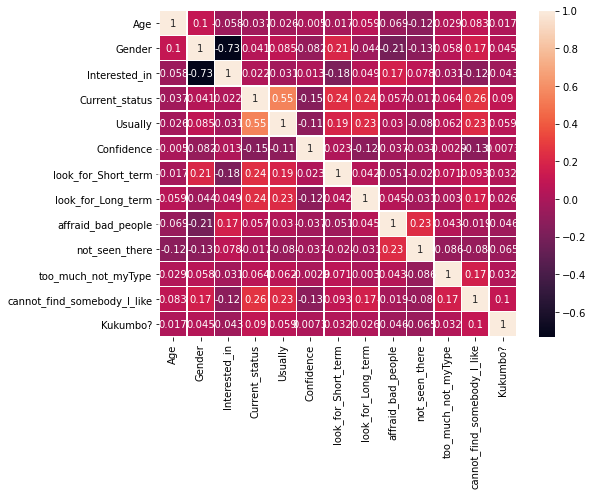

In [21]:
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)

## Desicion Tree

In [6]:
import graphviz
from sklearn import tree
import pydotplus

In [7]:
import os

In [8]:
X = df.drop('Kukumbo?',axis=1)
y = pd.DataFrame(df['Kukumbo?'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
y_train = y_train.replace([0,1], ['No', 'Yes'])
y_test = y_test.replace([0,1], ['No', 'Yes'])

In [10]:
train = pd.concat([X_train,y_train],axis=1)
classes = np.unique(y_train)

In [11]:
def plot_accuracy(train_acc, test_acc):  
    ds = list(range(1, len(train_acc)+1))
    plt.scatter(ds,train_acc, s=10,label='Train')
    plt.scatter(ds,test_acc, s=10,label='Test')
    plt.xlabel('Max-depth',fontsize=15)
    plt.ylabel('Accuracy',fontsize=15)
    plt.title('Accuracy as a function of max-depth on train & test data',fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(axis='y')
    plt.show()

In [14]:
def build_tree(X_train, X_test=None, y_train=y_train, y_test=y_test, max_d=5,dir_name=None, to_pdf=True, to_plot=False):
    train_acc = list()
    test_acc = list()
    ds = range(1,max_d)
    
    make_dir(dir_name)

    for d in ds:
        clf = DecisionTreeClassifier(max_depth=d)
        clf.fit(X_train,y_train)
        y_pred_train = clf.predict(X_train)
        
        if to_pdf:
            # create a graph
            dot_data = tree.export_graphviz(clf, out_file=None, 
                                           feature_names=list(X_train.columns),
                                           class_names=list(classes),
                                           filled=True)
            graph = pydotplus.graph_from_dot_data(dot_data)
        
            #save to pdf
            graph.write_pdf(f'{dir_name}_tree_{d}.pdf')
        
        if to_plot:
            y_pred_test = clf.predict(X_test)
            
            train_acc.append(accuracy_score(y_train, y_pred_train))
            test_acc.append(accuracy_score(y_test, y_pred_test))
        
    if to_plot:
        plot_accuracy(train_acc, test_acc)

In [15]:
def make_dir(dir_name):
    # Parent Directory path
    parent_dir = r'C:\Users\danie\Desktop\IDC\weekly_HW\DS_K_final\IDC-DS-FinalProject'
  
    # Path
    path = os.path.join(parent_dir, dir_name)
  
    # Create the directory
    os.mkdir(path)

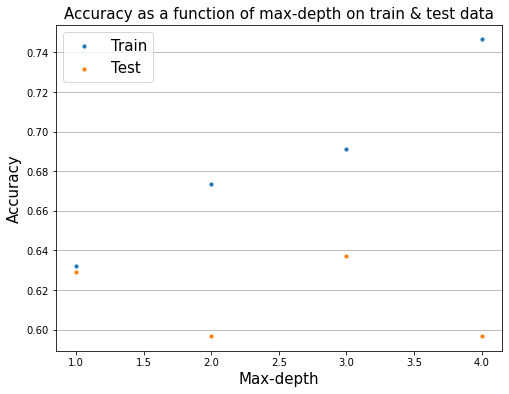

In [16]:
build_tree( X_train= X_train, X_test = X_test, max_d=5, dir_name= 'first_all_features', to_pdf=True, to_plot=True)

In [17]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

62.9

# Title

first we try to predict, we discovered bad results on the data. Then we saved to trees and analyze them. 
W saw that there is a bias on the main feature (- the root) since when we asked on experience all of those who have relationship or not used today apps do not have experience havs value 0. 

Then we decide to drop this column

Second, since our main goal is not to predict and only to  find strong feature and information about what happen in the market we split to 2 cases:
- build tree of all the data 
- bulid tree by 70% train and 30% test

In [18]:
# work with train and test 
X_train_noExp = X_train.drop(columns=['experience'])
X_test_noExp = X_test.drop(columns=['experience'])

# work on all data 
X_all_noExp = X.drop(columns=['experience'])

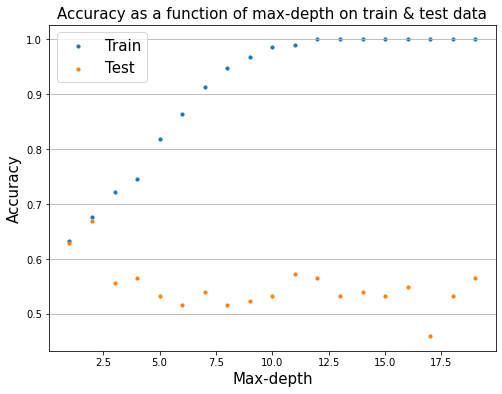

In [19]:
build_tree(X_train= X_train_noExp, X_test= X_test_noExp, max_d=20, dir_name= 'train_test_no_Exp', to_pdf=False, to_plot=True)

In [20]:
build_tree( X_train= X_all_noExp, y_train = y, max_d=5, dir_name = 'all_data_noExp', to_pdf=True, to_plot=False)

# Title 2

we still have the same problem so think to try to drop all those who have a realationship 

In [25]:
X_all_singles = X[X['Current_status'] > 0]
y_all_singles = y[X['Current_status'] > 0]

X_all_singles = X_all_singles.drop(columns=['Location']) 

build_tree(X_train= X_all_singles, y_train = y_all_singles, max_d=5, dir_name = 'all_data_no_Location', to_pdf=True, to_plot=False)